# STOCK PRICE PREDICTION OF RELIANCE COMPANY(6 months rel_6m)

In [1]:
#IMPORTING ALL REQUIRED PACKAGES
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.ticker as ticker

In [2]:
rel_6m=pd.read_csv('rel_6m.csv')
rel_6m

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-28,2229.000000,2238.699951,2207.250000,2215.750000,2215.750000,516453.0
1,2020-09-29,2222.000000,2264.000000,2217.149902,2244.850098,2244.850098,325287.0
2,2020-09-30,2264.800049,2267.550049,2225.100098,2233.750000,2233.750000,1560690.0
3,2020-10-01,2264.000000,2264.000000,2213.850098,2225.050049,2225.050049,285180.0
4,2020-10-05,2246.000000,2249.000000,2205.500000,2211.149902,2211.149902,393079.0
...,...,...,...,...,...,...,...
120,2021-03-22,2075.000000,2075.000000,2033.900024,2061.850098,2061.850098,317137.0
121,2021-03-23,2064.000000,2109.899902,2057.250000,2089.050049,2089.050049,578793.0
122,2021-03-24,2080.550049,2080.550049,2040.800049,2047.300049,2047.300049,307569.0
123,2021-03-25,2050.550049,2057.550049,1985.000000,1992.750000,1992.750000,309621.0


# EXPLORATORY rel_6m ANALYSIS(EDA)

In [3]:
#CHECKING SHAPE OF rel_6mSET
rel_6m.shape

(125, 7)

In [4]:
#CHECKING NULL VALUES IN rel_6mSET
rel_6m.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [5]:
#SINCE THE rel_6mSET HAD NULL VALUES, WE REMOVE IT USING DROPNA() 
rel_6m1=rel_6m.dropna()
rel_6m1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-28,2229.000000,2238.699951,2207.250000,2215.750000,2215.750000,516453.0
1,2020-09-29,2222.000000,2264.000000,2217.149902,2244.850098,2244.850098,325287.0
2,2020-09-30,2264.800049,2267.550049,2225.100098,2233.750000,2233.750000,1560690.0
3,2020-10-01,2264.000000,2264.000000,2213.850098,2225.050049,2225.050049,285180.0
4,2020-10-05,2246.000000,2249.000000,2205.500000,2211.149902,2211.149902,393079.0
...,...,...,...,...,...,...,...
120,2021-03-22,2075.000000,2075.000000,2033.900024,2061.850098,2061.850098,317137.0
121,2021-03-23,2064.000000,2109.899902,2057.250000,2089.050049,2089.050049,578793.0
122,2021-03-24,2080.550049,2080.550049,2040.800049,2047.300049,2047.300049,307569.0
123,2021-03-25,2050.550049,2057.550049,1985.000000,1992.750000,1992.750000,309621.0


In [6]:
rel_6m1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
#DESCIPTION OF rel_6mSET
rel_6m1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,124.000000,124.000000,124.000000,124.000000,124.000000,1.240000e+02
mean,2042.935887,2065.531848,2011.447985,2034.752824,2034.752824,6.977305e+05
std,106.283179,105.106022,104.733111,103.995698,103.995698,4.883665e+05
min,1840.000000,1904.699951,1830.000000,1843.150024,1843.150024,1.577130e+05
25%,1963.000000,1983.237457,1931.999969,1956.475006,1956.475006,3.207948e+05
50%,2013.000000,2041.150024,1985.000000,2006.399964,2006.399964,5.147810e+05
75%,2109.000000,2121.300049,2070.362426,2098.500061,2098.500061,9.148578e+05
max,2291.000000,2309.399902,2269.550049,2287.350098,2287.350098,2.401302e+06


In [8]:
#INFORMATION ABOUT rel_6mSET
rel_6m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 124
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       124 non-null    object 
 1   Open       124 non-null    float64
 2   High       124 non-null    float64
 3   Low        124 non-null    float64
 4   Close      124 non-null    float64
 5   Adj Close  124 non-null    float64
 6   Volume     124 non-null    float64
dtypes: float64(6), object(1)
memory usage: 7.8+ KB


In [9]:
rel_6m2 = rel_6m1.groupby('Date')[['Close']].mean()


In [10]:
rel_6m2

,Close
Date,
2020-09-28,2215.750000
2020-09-29,2244.850098
2020-09-30,2233.750000
2020-10-01,2225.050049
2020-10-05,2211.149902
...,...
2021-03-22,2061.850098
2021-03-23,2089.050049
2021-03-24,2047.300049


In [11]:
type(rel_6m1.Date[0])

str

# VISUALIZATION OF rel_6mSET

Text(0, 0.5, 'Price')

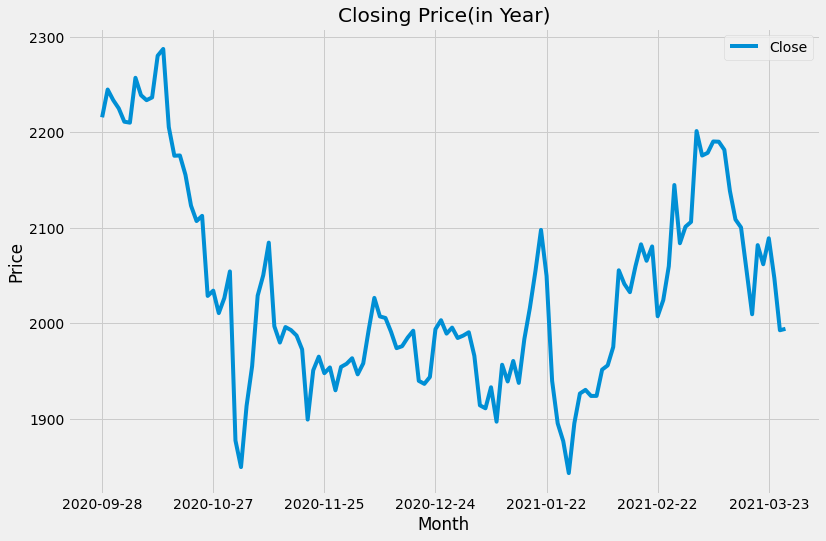

In [12]:
#plotting the graph with date againts closing price(in month)
rel_6m1.plot(figsize=(12,8),x='Date',y='Close',title='Closing Price(in Year)',fontsize=14)
plt.xlabel("Month")
plt.ylabel("Price")

In [13]:
rel_6m2

,Close
Date,
2020-09-28,2215.750000
2020-09-29,2244.850098
2020-09-30,2233.750000
2020-10-01,2225.050049
2020-10-05,2211.149902
...,...
2021-03-22,2061.850098
2021-03-23,2089.050049
2021-03-24,2047.300049


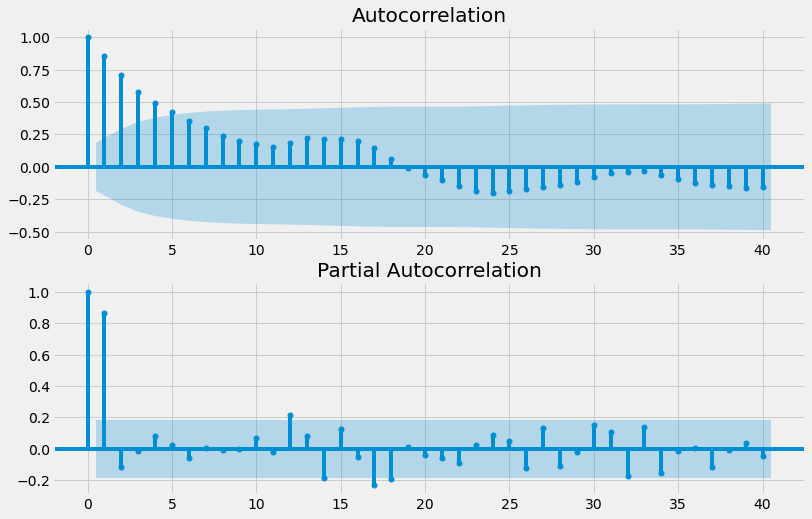

In [14]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(rel_6m2['Close'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(rel_6m2['Close'].iloc[13:],lags=40,ax=ax2)

# DICKEY FULLER TEST(For checking stationarity)

In [15]:
test_result=adfuller(rel_6m2['Close'])
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. rel_6m has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [16]:
rel_6m2['Close First Difference'] = rel_6m2['Close'] - rel_6m2['Close'].shift(1)
rel_6m2['Close'].shift(1)


Date
2020-09-28            NaN
2020-09-29    2215.750000
2020-09-30    2244.850098
2020-10-01    2233.750000
2020-10-05    2225.050049
                 ...     
2021-03-22    2081.899902
2021-03-23    2061.850098
2021-03-24    2089.050049
2021-03-25    2047.300049
2021-03-26    1992.750000
Name: Close, Length: 124, dtype: float64

ADF Test Statistic : -10.588608138738737
p-value : 6.616862570531358e-19
#Lags Used : 0
Number of Observations Used : 122
strong evidence against the null hypothesis(Ho), reject the null hypothesis. rel_6m has no unit root and is stationary


Text(0, 0.5, 'Price')

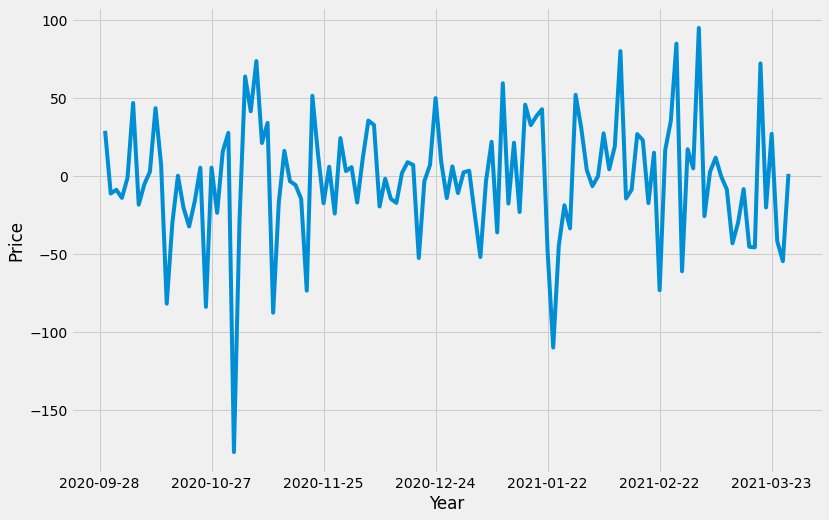

In [17]:
adfuller_test(rel_6m2['Close First Difference'].dropna())
rel_6m2['Close First Difference'].plot(figsize=(12,8))
plt.xlabel("Year")
plt.ylabel("Price")

In [18]:
stepwise_fit = auto_arima(rel_6m2['Close'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1256.310, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1258.141, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1258.116, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1254.567, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.019 seconds


In [19]:
train_rel_6m, test_rel_6m = rel_6m2[0:int(len(rel_6m2)*0.7)], rel_6m2[int(len(rel_6m2)*0.7):]
training_rel_6m = train_rel_6m['Close'].values
test_rel_6m = test_rel_6m['Close'].values
history = [x for x in training_rel_6m]
model_predictions = []
N_test_observations = len(test_rel_6m)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_rel_6m[time_point]
    history.append(true_test_value)


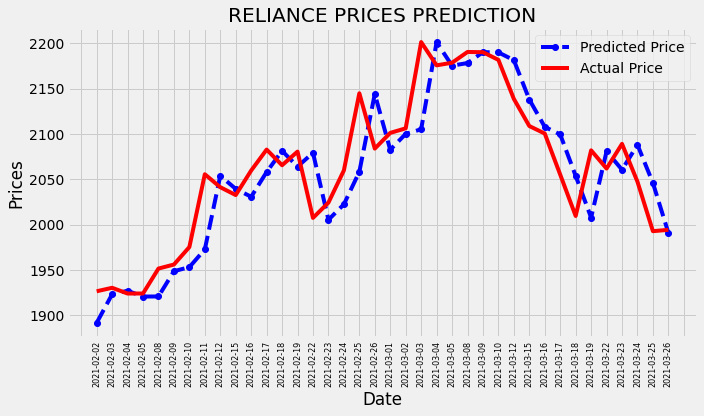

In [23]:
test_set_range = rel_6m2[int(len(rel_6m2)*0.7):].index
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_rel_6m, color='red', label='Actual Price')
plt.title('RELIANCE PRICES PREDICTION')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(rotation=90)
plt.tick_params(axis='x' ,labelsize=8)
# plt.xticks(np.arange(881,1259,50), rel_6m2.Date[881:1259:50])
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
pred=model_fit.predict(start=len(rel_6m2),end=len(rel_6m2)+30,typ='levels')
print(pred)

[1990.92213115 1989.0942623  1987.26639344 1985.43852459 1983.61065574
 1981.78278689 1979.95491803 1978.12704918 1976.29918033 1974.47131148
 1972.64344262 1970.81557377 1968.98770492 1967.15983607 1965.33196721
 1963.50409836 1961.67622951 1959.84836066 1958.0204918  1956.19262295
 1954.3647541  1952.53688525 1950.70901639 1948.88114754 1947.05327869
 1945.22540984 1943.39754098 1941.56967213 1939.74180328 1937.91393443
 1936.08606557 1934.25819672]


In [22]:
# model performance
mse = mean_squared_error(test_rel_6m, model_predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_rel_6m,model_predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_rel_6m, model_predictions))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(model_predictions - test_rel_6m)/np.abs(test_rel_6m))
print('MAPE: '+str(mape))

MSE: 1532.0691268610954
MAE: 29.714302544029472
RMSE: 39.14165462600036
MAPE: 0.04509328615711971
